In [17]:
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams["axes.titlesize"] = 18

# Campionamento di Funzione D'Onda Quantistica con l'Algoritmo di Metropolis

Il modulo quadro della funzione d'onda quantistica è una distribuzione di probabilità e quindi è campionabile con l'algoritmo di Metropolis.

0. Scegliere una ragionevole posizione iniziale.
1. Generare una nuova posizione con una transizione  simmetrica (nucleo stocastico con $P(x'|x) = P(x|x') $)
2. Accettare la nuova posizione sempre se porta ad uno stato di probabilità maggiore, o con probabilità $P(x') / P(x)$
3. Ripetere a piacere

| Wavefunction | Uniform dr | Gaussian dr|
| :---          |:----:|:---: |
| Ground State  | 1.0  | 0.8  |
| Excited State | 2.5  | 1.7 |

## Stato Fondamentale (Posizioni Campionate e Posizione Media)

$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$

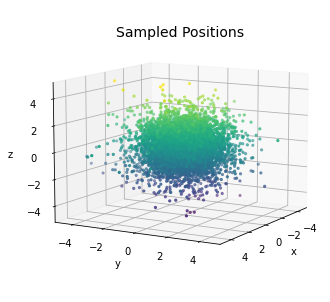

In [18]:
# 3D View
datafile = "./data/gs/gaussian/positions.dat"
# datafile = "./data/gs/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=" ", unpack="true")

fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
N = 10000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker=".")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
lim = 5
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)
plt.title("Sampled Positions", y=0.95, fontsize=14)
plt.show()

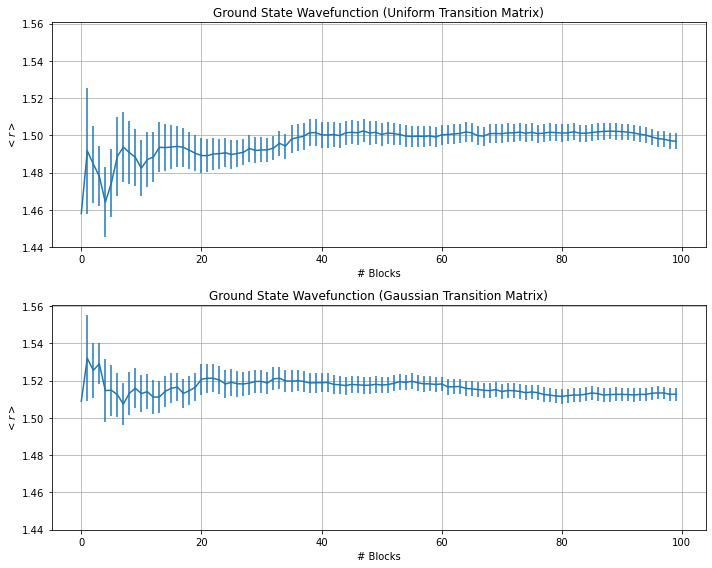

In [23]:
# Average Position

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharey=True)
matplotlib.rcParams["axes.titlesize"] = 12

datafile = "./data/gs/uniform/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
ax[0].grid(True)
ax[0].errorbar(x, avg, yerr=err)
ax[0].set_xlabel("# Blocks")
ax[0].set_ylabel("$<r>$")
ax[0].title.set_text("Ground State Wavefunction (Uniform Transition Matrix)")

datafile = "./data/gs/gaussian/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
ax[1].grid(True)
ax[1].errorbar(x, avg, yerr=err)
ax[1].set_xlabel("# Blocks")
ax[1].set_ylabel("$<r>$")
ax[1].title.set_text("Ground State Wavefunction (Gaussian Transition Matrix)")

plt.tight_layout()
plt.show()

## Stato Eccitato (Posizioni Campionate e Posizione Media)

$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$

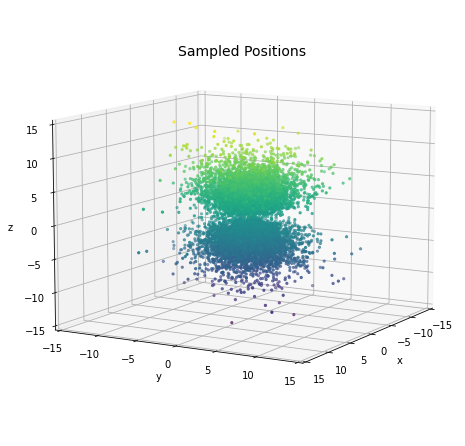

In [24]:
# 3D View
datafile = "./data/es/gaussian/positions.dat"
# datafile = "./data/es/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=" ", unpack="true")

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
N = 10000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker=".")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
lim = 15
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)
plt.title("Sampled Positions", y=0.95, fontsize=14)
plt.show()

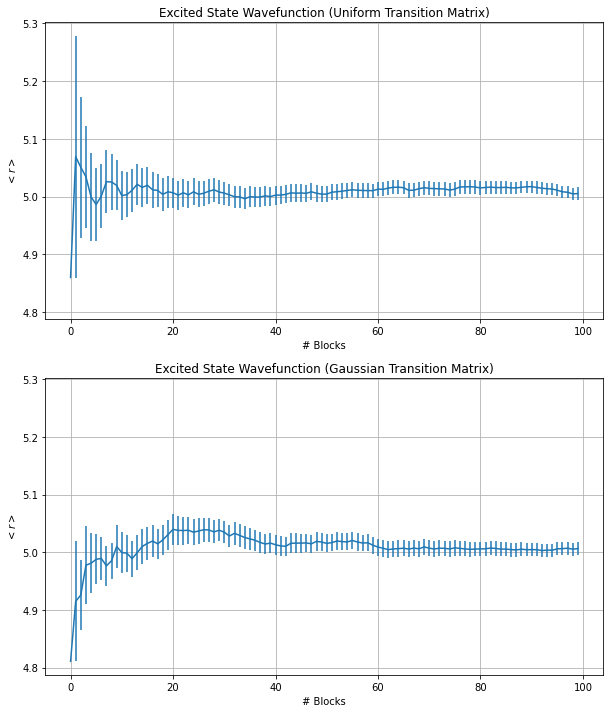

In [32]:
# Average Position

fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharey=True)
matplotlib.rcParams["axes.titlesize"] = 12

datafile = "./data/es/uniform/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
ax[0].grid(True)
ax[0].errorbar(x, avg, yerr=err)
ax[0].set_xlabel("# Blocks")
ax[0].set_ylabel("$<r>$")
ax[0].title.set_text("Excited State Wavefunction (Uniform Transition Matrix)")

datafile = "./data/es/gaussian/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
ax[1].grid(True)
ax[1].errorbar(x, avg, yerr=err)
ax[1].set_xlabel("# Blocks")
ax[1].set_ylabel("$<r>$")
ax[1].title.set_text("Excited State Wavefunction (Gaussian Transition Matrix)")

plt.show()

## Too far from the origin

Try : $r_0 = (50, 50, 50)$.

Over time, we crawl closer and closer to the origin (the region of high probability density). However, our average position is consistently overestimated because we sampled those extremely unlikely configurations at the beginning of the simulation.

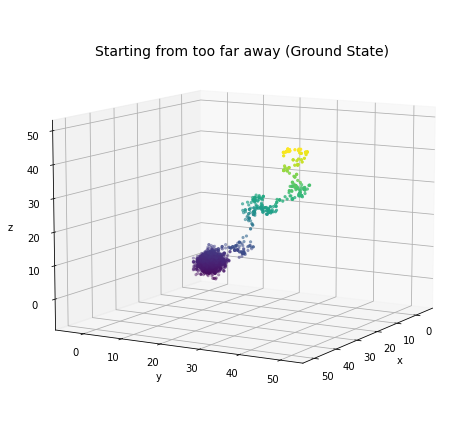

In [72]:
# 3D View
datafile = "./data/toofar/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=" ", unpack="true")

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
N = 10000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker=".")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# lim = 10
# ax.set_xlim3d(-lim, lim)
# ax.set_ylim3d(-lim, lim)
# ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)
plt.title("Starting from too far away (Ground State)", y=0.95, fontsize=14)
plt.show()

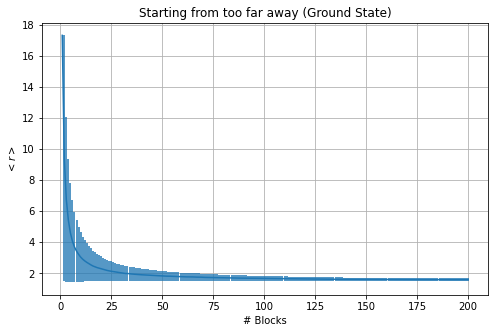

In [73]:
# Average Position

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
datafile = "./data/toofar/average_position.dat"
block, avg, err = np.loadtxt(datafile, usecols=(0, 1, 2), unpack=True)
plt.grid(True)
plt.errorbar(block, avg, yerr=err)
plt.xlabel("# Blocks")
plt.ylabel("$<r>$")
plt.title("Starting from too far away (Ground State)")

plt.show()

## Too few steps in each block

In this case it seems as if we're underestimating the error of our measurements until we reach a critical block size.

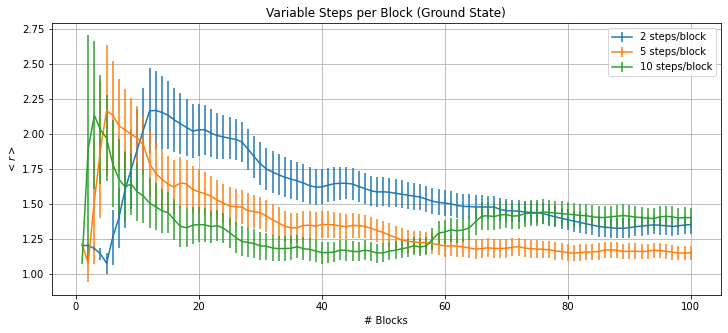

In [88]:
# Average Position

fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharey=True)

block, avg, err = np.loadtxt("./data/toofew/2/average_position.dat", usecols=(0, 1, 2), unpack=True)
plt.errorbar(block, avg, yerr=err, label='2 steps/block')

block, avg, err = np.loadtxt("./data/toofew/5/average_position.dat", usecols=(0, 1, 2), unpack=True)
plt.errorbar(block, avg, yerr=err, label='5 steps/block')

block, avg, err = np.loadtxt("./data/toofew/10/average_position.dat", usecols=(0, 1, 2), unpack=True)
plt.errorbar(block, avg, yerr=err, label='10 steps/block')

# block, avg, err = np.loadtxt("./data/toofew/20/average_position.dat", usecols=(0, 1, 2), unpack=True)
# plt.errorbar(block, avg, yerr=err, label='20 steps/block')

# block, avg, err = np.loadtxt("./data/toofew/30/average_position.dat", usecols=(0, 1, 2), unpack=True)
# plt.errorbar(block, avg, yerr=err, label='30 steps/block')

# block, avg, err = np.loadtxt("./data/toofew/40/average_position.dat", usecols=(0, 1, 2), unpack=True)
# plt.errorbar(block, avg, yerr=err, label='40 steps/block')

# block, avg, err = np.loadtxt("./data/toofew/50/average_position.dat", usecols=(0, 1, 2), unpack=True)
# plt.errorbar(block, avg, yerr=err, label='50 steps/block')

plt.title("Variable Steps per Block (Ground State)")
plt.xlabel("# Blocks")
plt.ylabel("$<r>$")
plt.grid(True)
plt.legend()

plt.show()

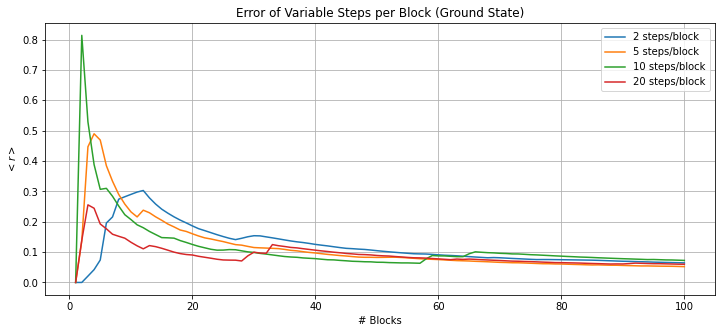

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharey=True)

block, err = np.loadtxt("./data/toofew/2/average_position.dat", usecols=(0, 2), unpack=True)
plt.plot(block, err, label='2 steps/block')

block, err = np.loadtxt("./data/toofew/5/average_position.dat", usecols=(0, 2), unpack=True)
plt.plot(block, err, label='5 steps/block')

block, err = np.loadtxt("./data/toofew/10/average_position.dat", usecols=(0, 2), unpack=True)
plt.plot(block, err, label='10 steps/block')

block, err = np.loadtxt("./data/toofew/20/average_position.dat", usecols=(0, 2), unpack=True)
plt.plot(block, err, label='20 steps/block')

# block, err = np.loadtxt("./data/toofew/30/average_position.dat", usecols=(0, 2), unpack=True)
# plt.plot(block, err, label='30 steps/block')

# block, err = np.loadtxt("./data/toofew/40/average_position.dat", usecols=(0, 2), unpack=True)
# plt.plot(block, err, label='40 steps/block')

# block, err = np.loadtxt("./data/toofew/50/average_position.dat", usecols=(0, 2), unpack=True)
# plt.plot(block, err, label='50 steps/block')

plt.title("Error of Variable Steps per Block (Ground State)")
plt.xlabel("# Blocks")
plt.ylabel("$<r>$")
plt.grid(True)
plt.legend()

plt.show()